In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import color
from skimage.filters import threshold_otsu
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics
import seaborn as sns
import time
import datetime

# Data preprocessing
• Ustal liczbę rekordów i rozmiar obrazów w bazie.

• Dokonaj niezbędnych zmian w strukturze obrazu (np. przejście do skali szarości, binaryzacja, zmiana rozmiaru).

• Ustal liczbę klas i przydziel odpowiednie etykiety.

In [2]:
df= pd.read_csv("chinese_mnist.csv")
df["image_name"] = np.nan

for i in range(len(df)):
    image_name = 'input_' + str(df.iloc[i][0]) + "_" + str(df.iloc[i][1]) + "_" + str(df.iloc[i][2]) + ".jpg"
    df.loc[i, "image_name"] = image_name
    
df['value'] = df['value'].replace([100],11)
df['value'] = df['value'].replace([1000],12)
df['value'] = df['value'].replace([10000],13)
df['value'] = df['value'].replace([100000000],14)
df.head()

,suite_id,sample_id,code,value,character,image_name
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


In [3]:
print(df.isnull().sum())

suite_id      0
sample_id     0
code          0
value         0
character     0
image_name    0
dtype: int64


In [4]:
df.groupby(["value","character"]).size()

value  character
0      零            1000
1      一            1000
2      二            1000
3      三            1000
4      四            1000
5      五            1000
6      六            1000
7      七            1000
8      八            1000
9      九            1000
10     十            1000
11     百            1000
12     千            1000
13     万            1000
14     亿            1000
dtype: int64

In [5]:
print("Ilość wszystkich rekordów/obrazów: ", len(df))

Ilość wszystkich rekordów/obrazów:  15000


In [6]:
data = []
labels = []
import skimage.transform

for i in range(len(df)):
    path = 'data/data/' + str(df.iloc[i][5])
    image = color.rgb2gray(imread(path))
    thresh = threshold_otsu(image)
    binary = image > thresh 
    data.append(binary.astype(int))
    labels.append(df.iloc[i]['value'])  

<ipython-input-6-098202144d3d>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(imread(path))


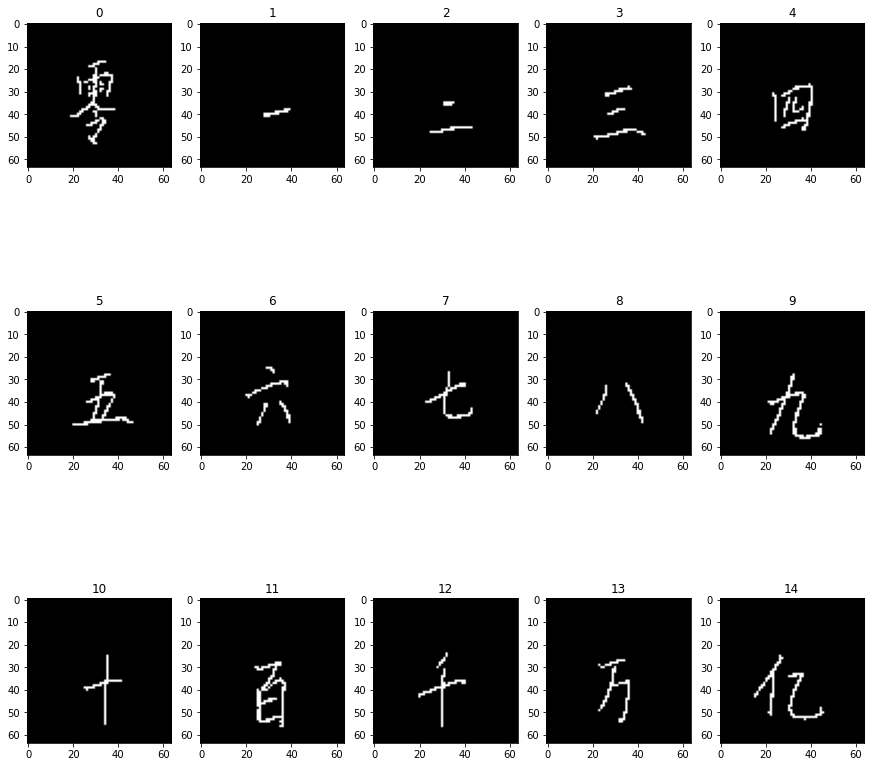

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 15))
ax[0][0].imshow(data[6000], cmap='gray')
ax[0][0].set_title("0")
ax[0][1].imshow(data[7000], cmap='gray')
ax[0][1].set_title("1")
ax[0][2].imshow(data[8000], cmap='gray')
ax[0][2].set_title("2")
ax[0][3].imshow(data[9000], cmap='gray')
ax[0][3].set_title("3")
ax[0][4].imshow(data[10000], cmap='gray')
ax[0][4].set_title("4")
ax[1][0].imshow(data[11000], cmap='gray')
ax[1][0].set_title("5")
ax[1][1].imshow(data[12000], cmap='gray')
ax[1][1].set_title("6")
ax[1][2].imshow(data[13000], cmap='gray')
ax[1][2].set_title("7")
ax[1][3].imshow(data[14000], cmap='gray')
ax[1][3].set_title("8")
ax[1][4].imshow(data[0], cmap='gray')
ax[1][4].set_title("9")
ax[2][0].imshow(data[1000], cmap='gray')
ax[2][0].set_title("10")
ax[2][1].imshow(data[2000], cmap='gray')
ax[2][1].set_title("11")
ax[2][2].imshow(data[3000], cmap='gray')
ax[2][2].set_title("12")
ax[2][3].imshow(data[4000], cmap='gray')
ax[2][3].set_title("13")
ax[2][4].imshow(data[5000], cmap='gray')
ax[2][4].set_title("14")


plt.show()


• Dokonaj podziału na zbiór treningowy i testowy. Dokonać
przetasowania.

• Ustal procentowy udział poszczególnych klas w zbiorze treningowych i
testowym. Wyniki przedstaw na wykresie.

In [8]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.3, shuffle=True)

print("Ilość elementów w zbiorze treningowym: ", len(X_train))
print("Ilość elementów w zbiorze testowym: ", len(X_test))

Ilość elementów w zbiorze treningowym:  10500
Ilość elementów w zbiorze testowym:  4500


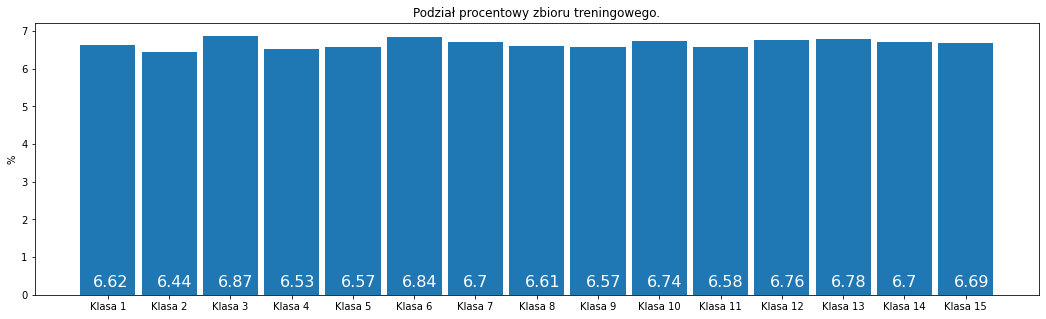

In [9]:
values = [round(np.count_nonzero(Y_train == 0)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 1)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 2)/len(Y_train)*100, 2),round(np.count_nonzero(Y_train == 3)/len(Y_train)*100, 2),round(np.count_nonzero(Y_train == 4)/len(Y_train)*100, 2),round(np.count_nonzero(Y_train == 5)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 6)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 7)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 8)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 9)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 10)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 11)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 12)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 13)/len(Y_train)*100, 2), round(np.count_nonzero(Y_train == 14)/len(Y_train)*100, 2)]
names = ("Klasa 1", "Klasa 2", "Klasa 3", "Klasa 4", "Klasa 5", "Klasa 6", "Klasa 7", "Klasa 8", "Klasa 9", "Klasa 10", "Klasa 11", "Klasa 12", "Klasa 13", "Klasa 14", "Klasa 15")
x = np.arange(len(names))
fx, ax = plt.subplots(figsize=(18,5))
plt.bar(x, values, width=0.9)
plt.xticks(x, names)
plt.text(-0.25, 0.2, round(np.count_nonzero(Y_train == 0)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(0.8, 0.2, round(np.count_nonzero(Y_train == 1)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(1.8, 0.2, round(np.count_nonzero(Y_train == 2)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(2.8, 0.2, round(np.count_nonzero(Y_train == 3)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(3.8, 0.2, round(np.count_nonzero(Y_train == 4)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(4.8, 0.2, round(np.count_nonzero(Y_train == 5)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(5.8, 0.2, round(np.count_nonzero(Y_train == 6)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(6.8, 0.2, round(np.count_nonzero(Y_train == 7)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(7.8, 0.2, round(np.count_nonzero(Y_train == 8)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(8.8, 0.2, round(np.count_nonzero(Y_train == 9)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(9.8, 0.2, round(np.count_nonzero(Y_train == 10)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(10.8, 0.2, round(np.count_nonzero(Y_train == 11)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(11.8, 0.2, round(np.count_nonzero(Y_train == 12)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(12.8, 0.2, round(np.count_nonzero(Y_train == 13)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.text(13.8, 0.2, round(np.count_nonzero(Y_train == 14)/len(Y_train)*100, 2), fontsize=16, color="white")
plt.ylabel("%")
plt.title('Podział procentowy zbioru treningowego.')
plt.show()

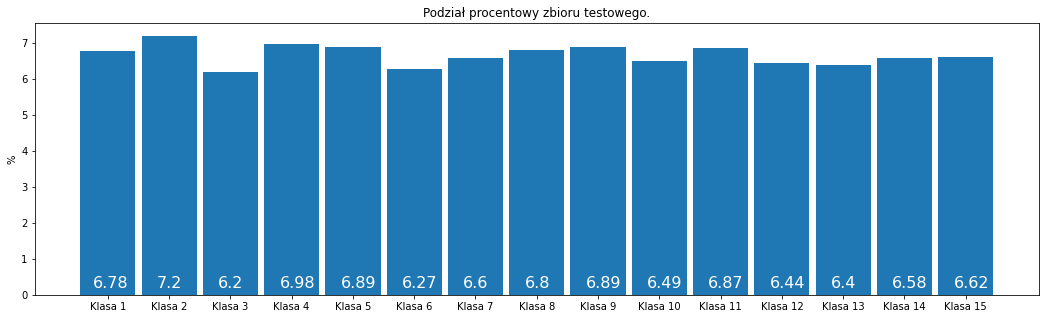

In [10]:
values = [round(np.count_nonzero(Y_test == 0)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 1)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 2)/len(Y_test)*100, 2),round(np.count_nonzero(Y_test == 3)/len(Y_test)*100, 2),round(np.count_nonzero(Y_test == 4)/len(Y_test)*100, 2),round(np.count_nonzero(Y_test == 5)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 6)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 7)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 8)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 9)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 10)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 11)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 12)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 13)/len(Y_test)*100, 2), round(np.count_nonzero(Y_test == 14)/len(Y_test)*100, 2)]
names = ("Klasa 1", "Klasa 2", "Klasa 3", "Klasa 4", "Klasa 5", "Klasa 6", "Klasa 7", "Klasa 8", "Klasa 9", "Klasa 10", "Klasa 11", "Klasa 12", "Klasa 13", "Klasa 14", "Klasa 15")
x = np.arange(len(names))
fx, ax = plt.subplots(figsize=(18,5))
plt.bar(x, values, width=0.9)
plt.xticks(x, names)
plt.text(-0.25, 0.2, round(np.count_nonzero(Y_test == 0)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(0.8, 0.2, round(np.count_nonzero(Y_test == 1)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(1.8, 0.2, round(np.count_nonzero(Y_test == 2)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(2.8, 0.2, round(np.count_nonzero(Y_test == 3)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(3.8, 0.2, round(np.count_nonzero(Y_test == 4)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(4.8, 0.2, round(np.count_nonzero(Y_test == 5)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(5.8, 0.2, round(np.count_nonzero(Y_test == 6)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(6.8, 0.2, round(np.count_nonzero(Y_test == 7)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(7.8, 0.2, round(np.count_nonzero(Y_test == 8)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(8.8, 0.2, round(np.count_nonzero(Y_test == 9)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(9.8, 0.2, round(np.count_nonzero(Y_test == 10)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(10.8, 0.2, round(np.count_nonzero(Y_test == 11)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(11.8, 0.2, round(np.count_nonzero(Y_test == 12)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(12.8, 0.2, round(np.count_nonzero(Y_test == 13)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.text(13.8, 0.2, round(np.count_nonzero(Y_test == 14)/len(Y_test)*100, 2), fontsize=16, color="white")
plt.ylabel("%")
plt.title('Podział procentowy zbioru testowego.')
plt.show()

# Model
• Przygotuj model sztucznej sieci neuronowej z uwzględnieniem warstwy
wejściowej (rozmiar danych) i warstwy wyjściowej (liczba klas).

• Dodaj dwie warstwy ukryte (np. 128 neuronów, 64 neuronów). Funkcja
aktywacji ‘relu’.

• Dokonaj kompilacji modelu z odpowiednią funkcją straty.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                975       
Total params: 533,647
Trainable params: 533,647
Non-trainable params: 0
_________________________________________________________________


# Trenowanie i ewaluacja
• Wytrenuj model na zbiorze treningowym. Domyślnie ustal 10 epok.

• Oceń dokładność modelu na zbiorze treningowym. Wyświetl macierz
błędu.


In [19]:
start1 = time.time()
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10, callbacks=[tensorboard_callback])
stop1 = time.time()

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 1.8842 - accuracy: 0.4124 - val_loss: 1.2559 - val_accuracy: 0.6122
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 0.8471 - accuracy: 0.7344 - val_loss: 0.8928 - val_accuracy: 0.7067
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.8589 - val_loss: 0.7899 - val_accuracy: 0.7400
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.9230 - val_loss: 0.7829 - val_accuracy: 0.7467
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1657 - accuracy: 0.9580 - val_loss: 0.7898 - val_accuracy: 0.7653
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9799 - val_loss: 0.8417 - val_accuracy: 0.7624
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9869 - val_loss: 0.9224 - val_accuracy: 0.7582
Epoch 

In [20]:
print(stop1 - start1)

8.753051519393921


In [21]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 1.0034 - accuracy: 0.7682
Dokładność zestawu testowego: 0.7682222127914429


In [22]:
Y_pred = []
for i in range (predictions.shape[0]):
    Y_pred.append(np.argmax(predictions[i]))
matrix = metrics.confusion_matrix(Y_test, Y_pred)

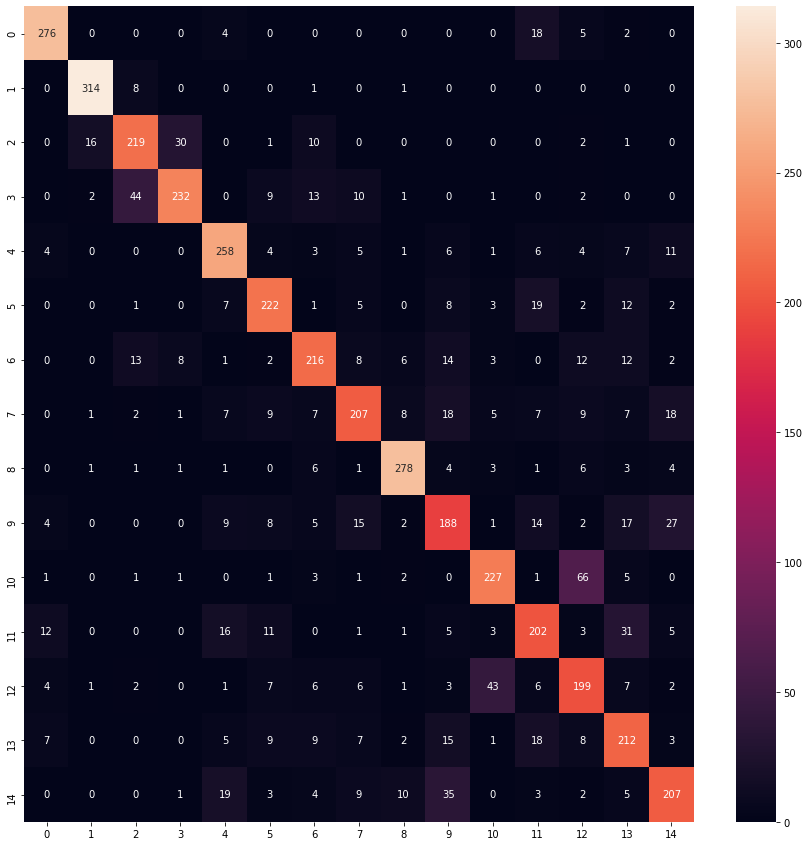

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(matrix, annot=True, fmt="d")

# Ocena modelu
• Stwórz wykres przedstawiający dokładność modelu na zbiorze
treningowym i testowym w kolejnych epokach.

• Stwórz analogiczny wykres dla straty. Czy występuje zjawisko nadmiernego
dopasowania?

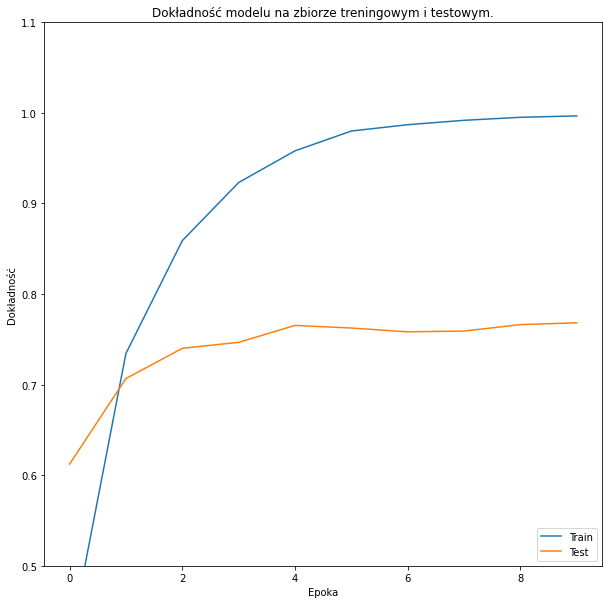

In [24]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

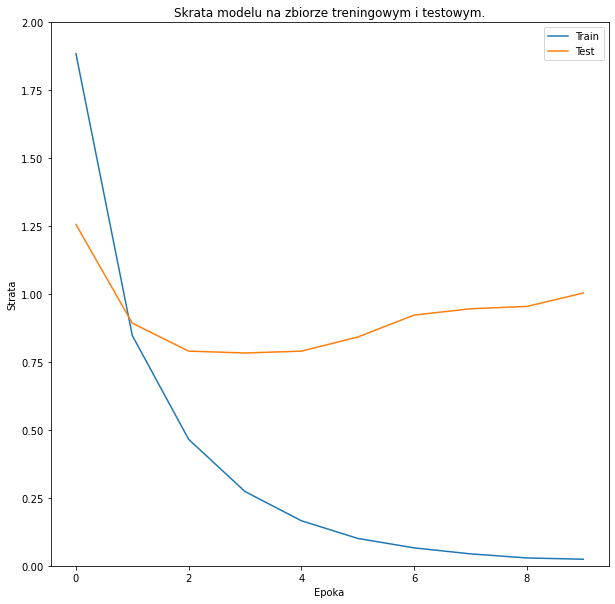

In [25]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Analiza wyników
• Dla 100 przykładowych rekordów z bazy testowej przedstaw rozkłady
prawdopodobieństwa względem poszczególnych klas (do każdego rekordu
dodaj wykres).

• Przedstaw wnioski wynikające z macierzy błędu. Przykłady:

-Czy któraś z klas jest wyraźnie błędnie klasyfikowana jako inna?

-Czy któryś błąd klasyfikacji występuję najczęściej?

• Dokonaj analizy zawartości dostępnej w TensorBoard
(https://www.tensorflow.org/tensorboard/get_started). Przedstaw graf
reprezentujący strukturę modelu.


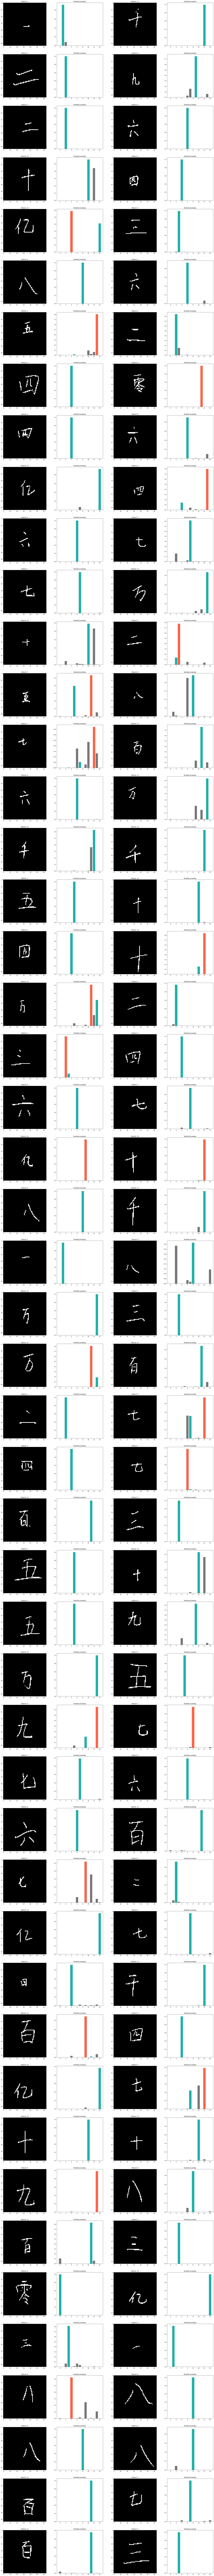

In [26]:
plt.figure(figsize=(32,400))
for i in range(100):
    plt.subplot(50, 4, 2*i+1)
    plt.title("Rekord: " + str(Y_test[i]))
    plt.imshow(X_test[i], cmap='gray')
    plt.subplot(50, 4, 2*i+2)
    plt.title("Rozkład prawdop.")
    color_bar = plt.bar(range(15), predictions[i], color="#777777")
    color_bar[Y_pred[i]].set_color('tomato')
    color_bar[Y_test[i]].set_color('lightseagreen')
    
plt.show()

Wnioski z macierzy błędu:

    * błędnie klasyfikowane klasy:
    
    - klasa 2 i 3 (二 oraz 三)
    
    - klasa 10 i 12 (十 oraz 千)

In [27]:
%load_ext tensorboard

In [28]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 7556), started 3:52:37 ago. (Use '!kill 7556' to kill it.)

# Strojenie parametrów sieci
• Porównaj wyniki dokładności przy zastosowaniu innych funkcji aktywacji
(https://keras.io/api/layers/activations/). Pierwotne relu zmień na wybraną
przez siebie funkcję. Porównaj wyniki. Następnie wybierz jeszcze jedną
funkcję do eksperymentu (różną od poprzednich).

• Czy zwiększenie liczby epok poprawia znacząco dokładność modelu na
zbiorze testowym? Spróbuj oszacować limit przy którym dalsze
zwiększanie epok nie polepsza rezultatów.

• Dokonaj zmiany liczby neuronów warstw ukrytych. W pierwszym etapie
zmniejszy wszystkie o połowę. Sprawdź wyniki. W kolejnym etapie zwiększ
liczbę czterokrotnie (dwukrotnie względem pierwotnego modelu). Która
operacja poprawiła wyniki, a która pogorszyła? O ile?

• Dodaj dwie dodatkowe warstwy ukryte. Czy poprawiło to wyniki?

# Pierwsza funkcja aktywacji

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                975       
Total params: 533,647
Trainable params: 533,647
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 1.9212 - accuracy: 0.4088 - val_loss: 1.5656 - val_accuracy: 0.5313
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 1.2015 - accuracy: 0.6297 - val_loss: 1.2407 - val_accuracy: 0.6140
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.8229 - accuracy: 0.7387 - val_loss: 1.0692 - val_accuracy: 0.6518
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.8090 - val_loss: 0.9992 - val_accuracy: 0.6898
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8650 - val_loss: 1.0080 - val_accuracy: 0.6913
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.9020 - val_loss: 0.9674 - val_accuracy: 0.7127
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.2332 - accuracy: 0.9314 - val_loss: 1.0183 - val_accuracy: 0.7151
Epoch 

In [31]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 1.1204 - accuracy: 0.7258
Dokładność zestawu testowego: 0.725777804851532


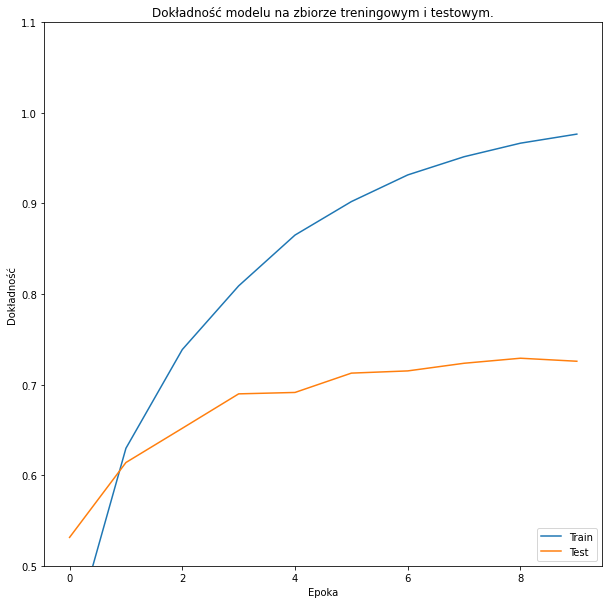

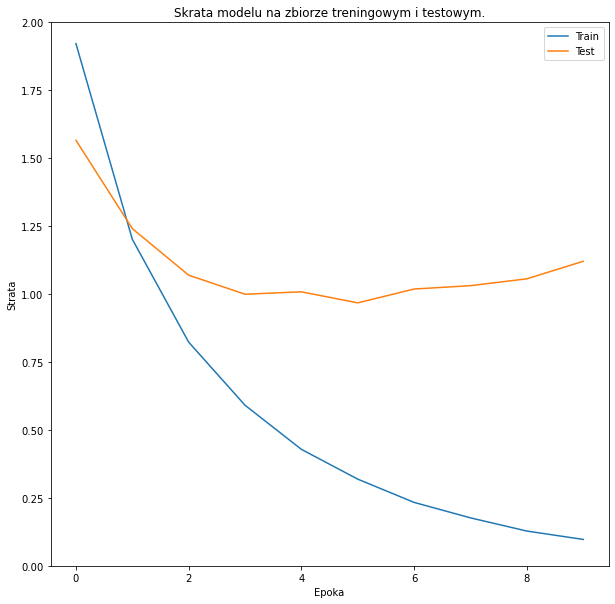

In [32]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Druga funkcja aktywacji

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 15)                975       
Total params: 533,647
Trainable params: 533,647
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 1.9561 - accuracy: 0.4089 - val_loss: 1.6255 - val_accuracy: 0.5156
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 1.3023 - accuracy: 0.6082 - val_loss: 1.3497 - val_accuracy: 0.5929
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.9581 - accuracy: 0.7168 - val_loss: 1.1934 - val_accuracy: 0.6242
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.7213 - accuracy: 0.7884 - val_loss: 1.1081 - val_accuracy: 0.6487
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.8482 - val_loss: 1.0135 - val_accuracy: 0.6809
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8922 - val_loss: 0.9855 - val_accuracy: 0.6858
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.9239 - val_loss: 0.9683 - val_accuracy: 0.7031
Epoch 

In [35]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 0.9999 - accuracy: 0.7207
Dokładność zestawu testowego: 0.7206666469573975


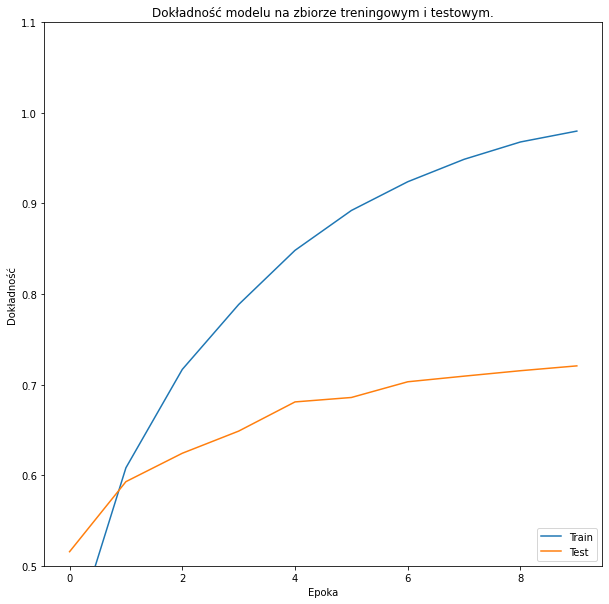

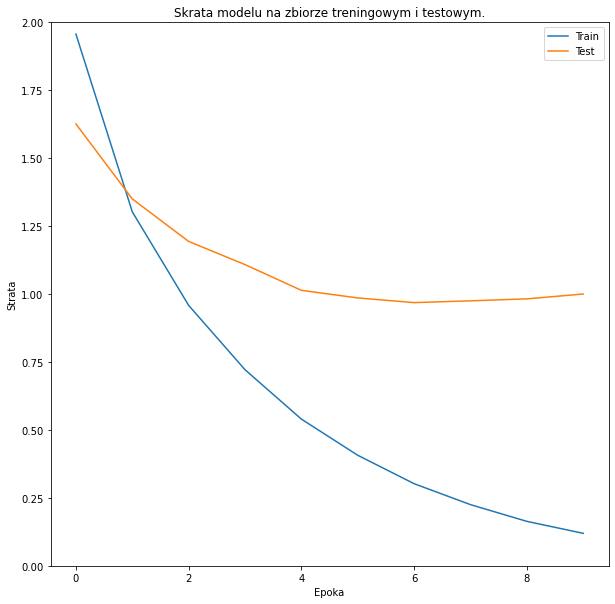

In [36]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Zwiększenie epok

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 15)                975       
Total params: 533,647
Trainable params: 533,647
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30)

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 1.8206 - accuracy: 0.4423 - val_loss: 1.2236 - val_accuracy: 0.6302
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.8285 - accuracy: 0.7432 - val_loss: 0.8839 - val_accuracy: 0.7127
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.8622 - val_loss: 0.7615 - val_accuracy: 0.7573
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9266 - val_loss: 0.7591 - val_accuracy: 0.7598
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1531 - accuracy: 0.9625 - val_loss: 0.7891 - val_accuracy: 0.7609
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9753 - val_loss: 0.7939 - val_accuracy: 0.7716
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9891 - val_loss: 0.8371 - val_accuracy: 0.7764
Epoch 

In [39]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 1.2558 - accuracy: 0.7871
Dokładność zestawu testowego: 0.7871111035346985


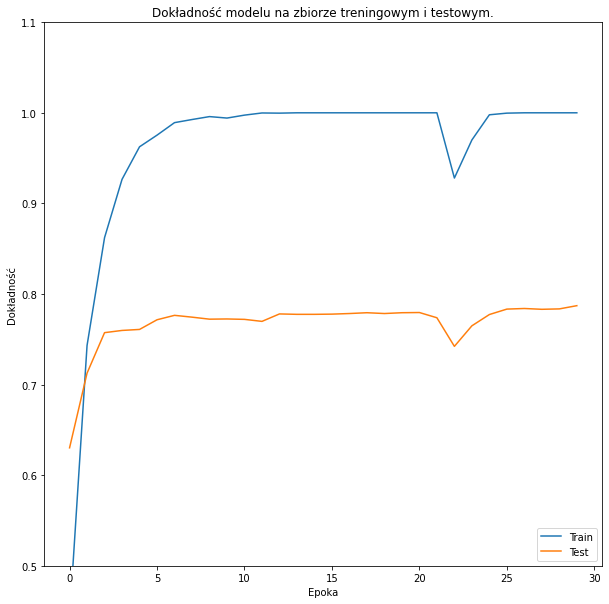

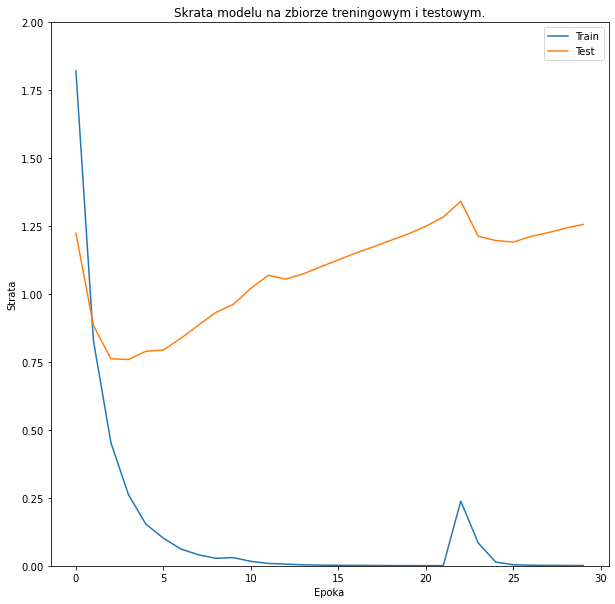

In [40]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Zmiana neuronów - zmniejszenie

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 15)                495       
Total params: 264,783
Trainable params: 264,783
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
329/329 [==============================] - 1s 2ms/step - loss: 1.9918 - accuracy: 0.3806 - val_loss: 1.4543 - val_accuracy: 0.5633
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 1.1001 - accuracy: 0.6718 - val_loss: 1.1165 - val_accuracy: 0.6449
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.7233 - accuracy: 0.7824 - val_loss: 0.9843 - val_accuracy: 0.6933
Epoch 4/10
329/329 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.8472 - val_loss: 0.9248 - val_accuracy: 0.7147
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3759 - accuracy: 0.8910 - val_loss: 0.9241 - val_accuracy: 0.7109
Epoch 6/10
329/329 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.9253 - val_loss: 0.9216 - val_accuracy: 0.7236
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9461 - val_loss: 0.9354 - val_accuracy: 0.7224
Epoch 

In [43]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 1.0950 - accuracy: 0.7260
Dokładność zestawu testowego: 0.7260000109672546


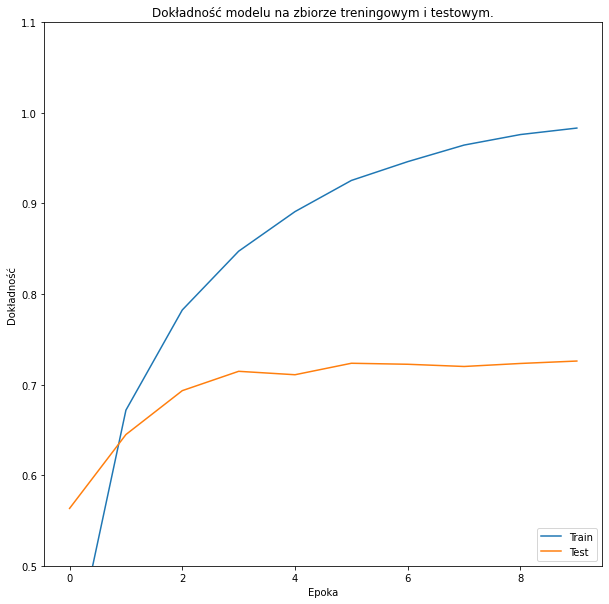

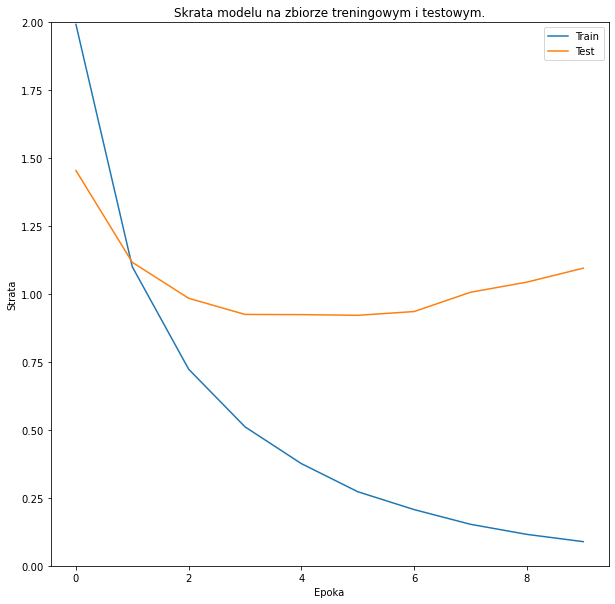

In [44]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Zmniana neuronów -zwiększenie

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 15)                1935      
Total params: 1,083,663
Trainable params: 1,083,663
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
329/329 [==============================] - 2s 4ms/step - loss: 1.6180 - accuracy: 0.4947 - val_loss: 0.9685 - val_accuracy: 0.6907
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.5835 - accuracy: 0.8130 - val_loss: 0.6805 - val_accuracy: 0.7796
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.2580 - accuracy: 0.9242 - val_loss: 0.6837 - val_accuracy: 0.7833
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1279 - accuracy: 0.9661 - val_loss: 0.6806 - val_accuracy: 0.7924
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0667 - accuracy: 0.9839 - val_loss: 0.7324 - val_accuracy: 0.8004
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9903 - val_loss: 0.7632 - val_accuracy: 0.8031
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0211 - accuracy: 0.9964 - val_loss: 0.7852 - val_accuracy: 0.8036
Epoch 

In [47]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 0.8665 - accuracy: 0.8042
Dokładność zestawu testowego: 0.8042222261428833


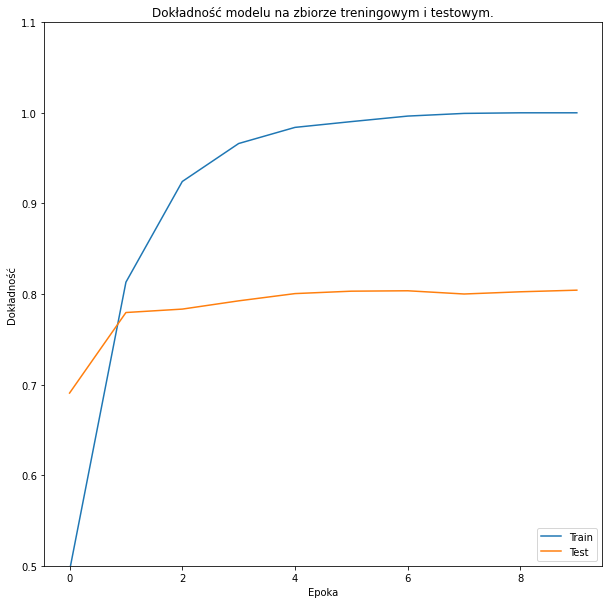

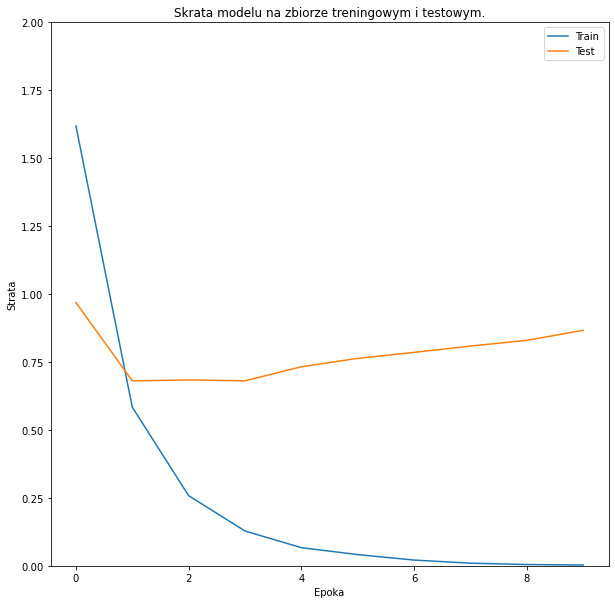

In [48]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Dodanie warstwy

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 15)                495       
Total params: 536,303
Trainable params: 536,303
Non-trainable params: 0
________________________________________________

In [50]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 1.9275 - accuracy: 0.3668 - val_loss: 1.2252 - val_accuracy: 0.6004
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 0.8690 - accuracy: 0.7087 - val_loss: 0.8852 - val_accuracy: 0.7049
Epoch 3/10
329/329 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.8279 - val_loss: 0.8391 - val_accuracy: 0.7267
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.9012 - val_loss: 0.8468 - val_accuracy: 0.7391
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1929 - accuracy: 0.9370 - val_loss: 0.8801 - val_accuracy: 0.7580
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1143 - accuracy: 0.9658 - val_loss: 1.0472 - val_accuracy: 0.7513
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9729 - val_loss: 1.1845 - val_accuracy: 0.7329
Epoch 

In [51]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
predictions = model.predict(X_test)
print("Dokładność zestawu testowego:", accuracy)

141/141 - 0s - loss: 1.3222 - accuracy: 0.7453
Dokładność zestawu testowego: 0.7453333139419556


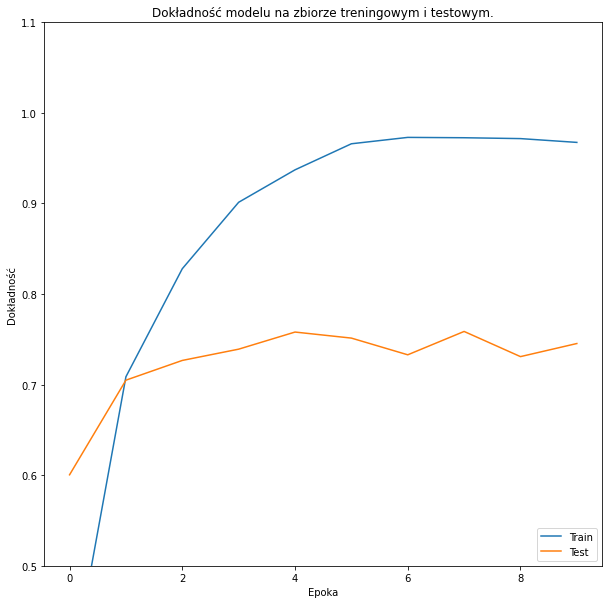

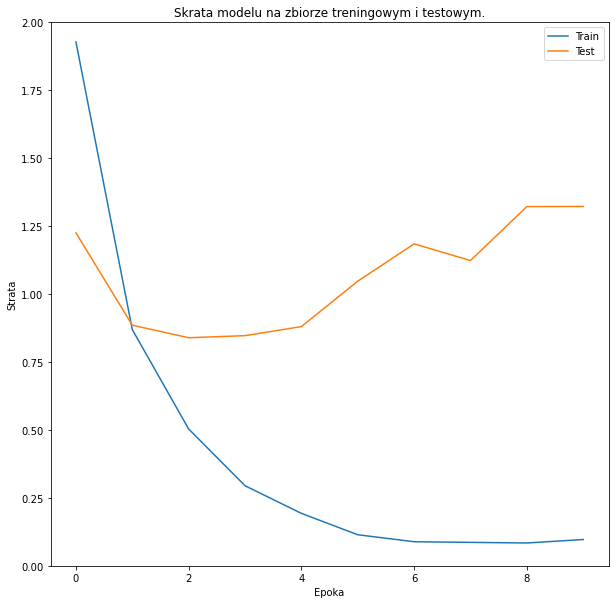

In [52]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

# Porównanie dokładności zbioru testowego w różnych wariancjach

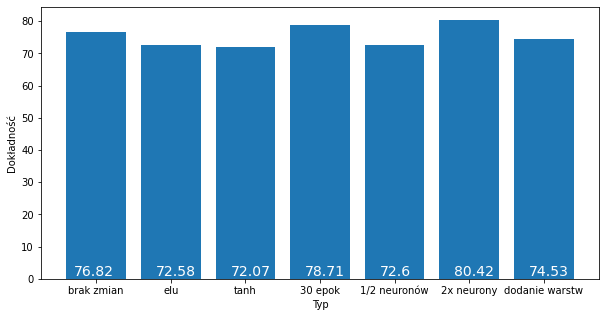

In [53]:
values = [76.82, 72.58, 72.07, 78.71, 72.60, 80.42, 74.53]
names = ("brak zmian", "elu", "tanh", "30 epok", "1/2 neuronów", "2x neurony", "dodanie warstw")
x = np.arange(len(names))

plt.subplots(figsize=(10,5))
plt.bar(x, values)
plt.xticks(x, names)
plt.text(-0.3, 1, 76.82, fontsize=14, color="white")
plt.text(0.8, 1, 72.58, fontsize=14, color="white")
plt.text(1.8, 1, 72.07, fontsize=14, color="white")
plt.text(2.8, 1, 78.71, fontsize=14, color="white")
plt.text(3.8, 1, 72.60, fontsize=14, color="white")
plt.text(4.8, 1, 80.42, fontsize=14, color="white")
plt.text(5.8, 1, 74.53, fontsize=14, color="white")
plt.xlabel('Typ')
plt.ylabel("Dokładność")
plt.show()

# Konwolucyjne sieci neuronowe
• Stwórz model używający konwulacyjnych warstw (Conv2D, MaxPooling2D).

• Porównaj czas uczenia modelu z i bez warstw konwulacyjnych.

• Czy dodanie tych warstw poprawiło jakość klasyfikatora? Jeśli tak, to o ile?
Porównaj wyniki na wykresie (stwórz wykresy straty i dokładności
analogiczne do tych z oceny modelu).

• Jak dodanie warstw wpłynęło na macierz błędu? Czy któryś z błędów
zostało całkowicie zredukowany? 

In [54]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation = 'softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)              

In [55]:
start2 = time.time()
history = model.fit(X_train.reshape(-1, 64,64,1),Y_train.reshape(-1,1),validation_data=(X_test.reshape(-1,64,64,1),Y_test.reshape(-1,1)),epochs=10)
stop2 = time.time()

Epoch 1/10
329/329 [==============================] - 16s 48ms/step - loss: 0.7684 - accuracy: 0.7430 - val_loss: 0.1983 - val_accuracy: 0.9402
Epoch 2/10
329/329 [==============================] - 16s 49ms/step - loss: 0.1417 - accuracy: 0.9530 - val_loss: 0.1850 - val_accuracy: 0.9436
Epoch 3/10
329/329 [==============================] - 17s 50ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.1480 - val_accuracy: 0.9556
Epoch 4/10
329/329 [==============================] - 17s 51ms/step - loss: 0.0581 - accuracy: 0.9806 - val_loss: 0.1136 - val_accuracy: 0.9711
Epoch 5/10
329/329 [==============================] - 17s 51ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.1732 - val_accuracy: 0.9584
Epoch 6/10
329/329 [==============================] - 16s 49ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0990 - val_accuracy: 0.9727
Epoch 7/10
329/329 [==============================] - 16s 49ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.1123 - val_accuracy:

In [56]:
print("Czas pierwszego modelu: ", stop1 - start1)
print("Czas modelu konwolucyjnego: ", stop2 - start2)

Czas pierwszego modelu:  8.753051519393921
Czas modelu konwolucyjnego:  163.86902785301208


In [57]:
loss, accuracy = model.evaluate(X_test.reshape(-1,64,64,1), Y_test.reshape(-1,1), verbose=2)
predictions = model.predict(X_test.reshape(-1,64,64,1))
print("Dokładność zestawu testowego:", accuracy)

141/141 - 1s - loss: 0.1011 - accuracy: 0.9762
Dokładność zestawu testowego: 0.9762222170829773


# 76.82% -> 97.62%

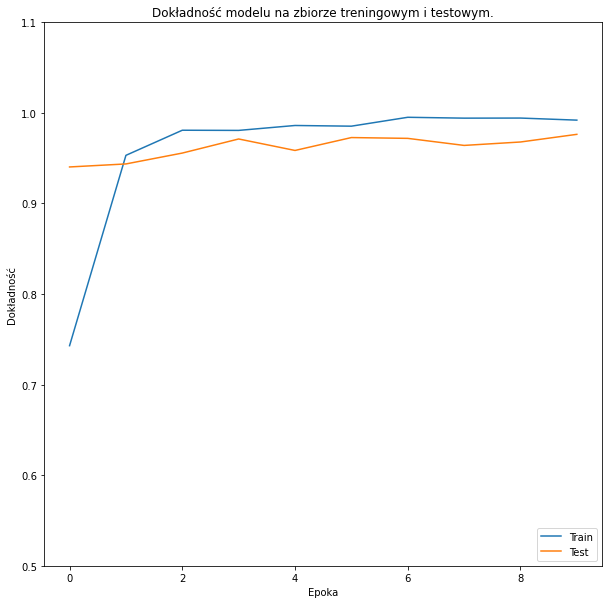

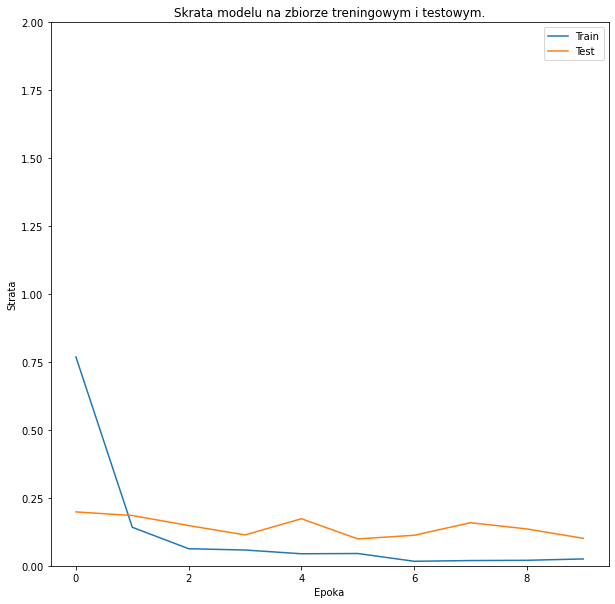

In [58]:
plt.subplots(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1.1])
plt.title("Dokładność modelu na zbiorze treningowym i testowym.")
plt.legend(loc='lower right')

plt.subplots(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0, 2])
plt.title("Skrata modelu na zbiorze treningowym i testowym.")
plt.legend(loc='upper right')

In [59]:
Y_pred = []
for i in range (predictions.shape[0]):
    Y_pred.append(np.argmax(predictions[i]))
matrix = metrics.confusion_matrix(Y_test, Y_pred)

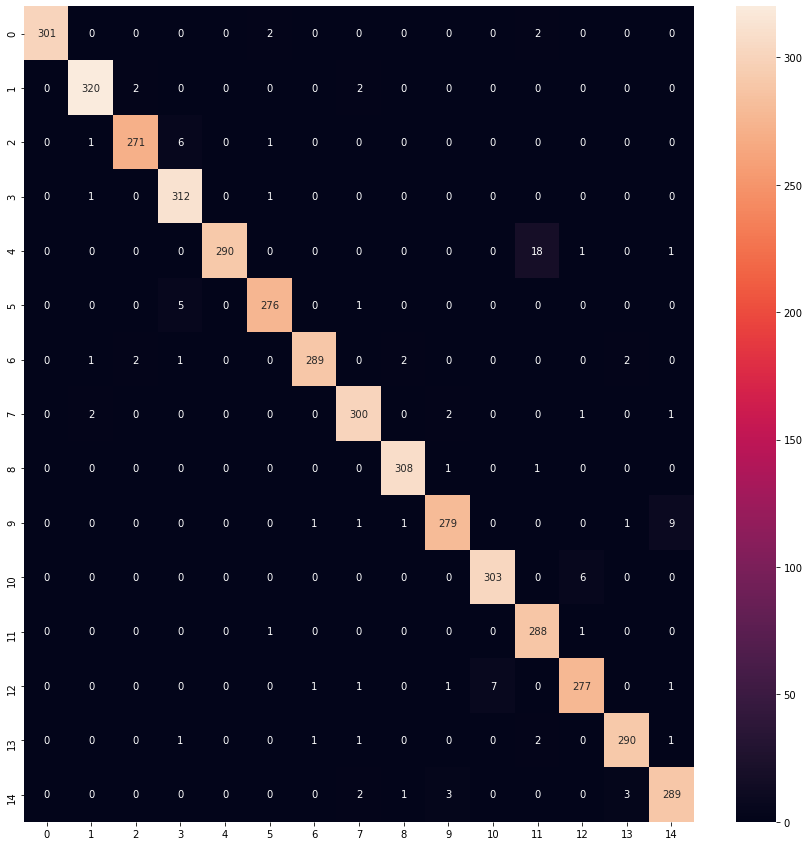

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(matrix, annot=True, fmt="d")